<p style="text-align:center;font-size:32px;">GRÁFICOS</p>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [228]:
# Se leen los archivos con los que se trabajará
df_bsbooks = pd.read_csv("./data/BSBooks.csv")
df_grbooks = pd.read_csv("./data/GRBooks.csv")
df_recbooks = pd.read_csv("./data/RECBooks.csv")
df_21bbooks = pd.read_csv("./data/21BBooks.csv")

# Archivo principal
df_datab = pd.read_csv("./data/DataBooks.csv")

# Se extraen los títulos del siglo XXI y se comprueba el contenido
df_databooks = df_datab.loc[df_datab["Año de publicación"] > 1999]
df_databooks.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8734 entries, 0 to 8750
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Título                8734 non-null   object 
 1   Serie                 8734 non-null   object 
 2   Autor                 8734 non-null   object 
 3   Género                8734 non-null   object 
 4   Año de publicación    8734 non-null   int64  
 5   Editor                8734 non-null   object 
 6   Páginas               8734 non-null   int64  
 7   BestSeller            8734 non-null   bool   
 8   Premiado              8734 non-null   bool   
 9   Mejor Valorado        8734 non-null   bool   
 10  Recomendado           8734 non-null   bool   
 11  Premios               8734 non-null   object 
 12  Valoración            8734 non-null   float64
 13  Votos                 8734 non-null   object 
 14  Reseñas               8734 non-null   object 
 15  Fecha de publicación  8734

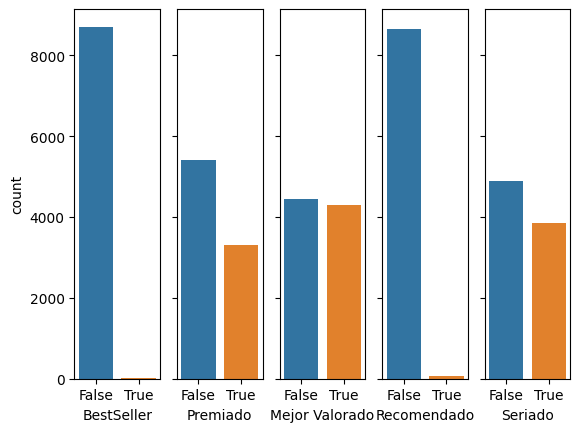

In [229]:
# Se muestran los gráficos de las columnas booleanas
fig,axs = plt.subplots(nrows=1,ncols=5, sharey = True)

sns.countplot(x = "BestSeller", data = df_databooks, ax = axs[0], hue = "BestSeller", legend = False)
sns.countplot(x = "Premiado", data = df_databooks, ax = axs[1], hue = "Premiado", legend = False)
sns.countplot(x = "Mejor Valorado", data = df_databooks, ax = axs[2], hue = "Mejor Valorado", legend = False)
sns.countplot(x = "Recomendado", data = df_databooks, ax = axs[3], hue = "Recomendado", legend = False)
sns.countplot(x = "Seriado", data = df_databooks, ax = axs[4], hue = "Seriado", legend = False);


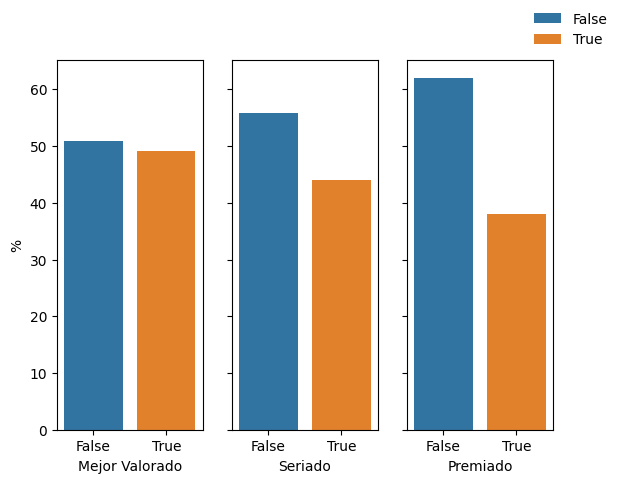

In [230]:
# Sólo resultan interesantes las columnas Premiado, mejor valorado y seriado. Se muestran en porcentaje
fig,axs = plt.subplots(1,3, sharey = True)

valores = df_databooks["Mejor Valorado"].value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[0], legend = False)
axs[0].set_ylabel("%")

valores = df_databooks["Seriado"].value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[1], legend = False)
axs[1].set_ylabel("%")

valores = df_databooks["Premiado"].value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[2], legend = True)
axs[2].set_ylabel("%")
axs[2].legend().set_visible(False)


handles, labels = axs[2].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', frameon = False);
#fig.suptitle("Diferentes vías de éxito");


In [231]:
# ¿Cuántos títulos cetán contenidos en las tres columnas de éxito?
df_databooks.loc[(df_databooks["Seriado"] == True)&(df_databooks["Mejor Valorado"] == True)&(df_databooks["Premiado"] == True), "Título"].count()


np.int64(848)

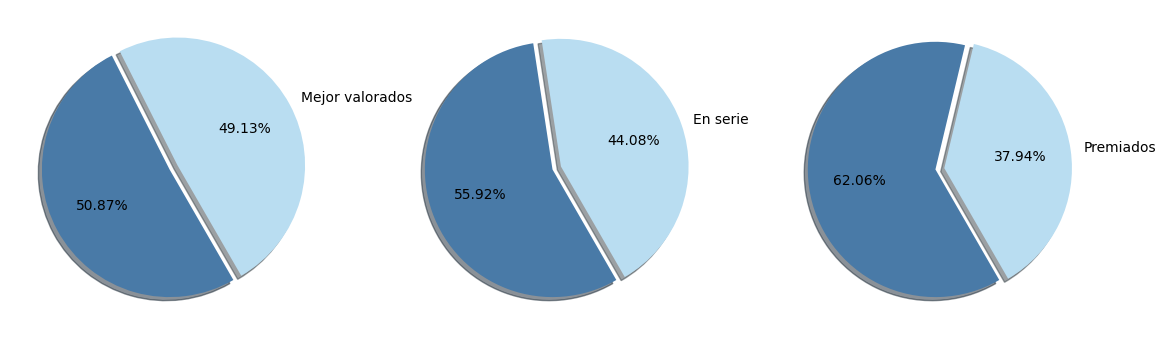

In [232]:
# Se muestra en un gráfico el porcentaje de títulos de cada una de las columnas de éxito
fig, axs = plt.subplots(1,3,figsize=(14, 14))

valores = [(df_databooks.loc[(df_databooks["Premiado"] == True), "Título"].count()),\
          (df_databooks.loc[(df_databooks["Premiado"] == False), "Título"].count())]
axs[2].pie(valores, labels = ["Premiados",""],colors = ["#B9DDF1","#497AA7"],autopct='%1.2f%%',explode = (0.07,0), shadow = True, startangle = 300);
valores = [(df_databooks.loc[(df_databooks["Mejor Valorado"] == True), "Título"].count()),\
          (df_databooks.loc[(df_databooks["Mejor Valorado"] == False), "Título"].count())]
axs[0].pie(valores, labels = ["Mejor valorados",""],colors = ["#B9DDF1","#497AA7"],autopct='%1.2f%%',explode = (0.07,0), shadow = True, startangle = 300);
valores = [(df_databooks.loc[(df_databooks["Seriado"] == True), "Título"].count()),\
          (df_databooks.loc[(df_databooks["Seriado"] == False), "Título"].count())]
axs[1].pie(valores, labels = ["En serie",""],colors = ["#B9DDF1","#497AA7"],autopct='%1.2f%%',explode = (0.07,0), shadow = True, startangle = 300);


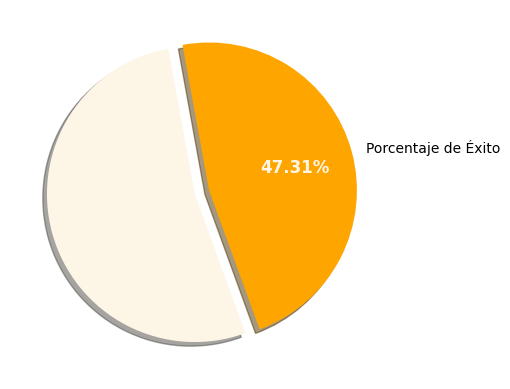

In [233]:
# Se muestra en un gráfico el porcentaje de ´títulos que se encuentra en las tres columnas que determinan el reconocimiento.    
valores = [(df_databooks.loc[(df_databooks["Seriado"] == True)|(df_databooks["Mejor Valorado"] == True)|(df_databooks["Premiado"] == True), "Título"].count()),\
          (df_databooks.loc[(df_databooks["Seriado"] == False)|(df_databooks["Mejor Valorado"] == False)|(df_databooks["Premiado"] == False), "Título"].count())]
_, _, autopcts = plt.pie(valores, labels = ["Porcentaje de Éxito",""],colors = ["orange","oldlace"],autopct = "%1.2f%%",explode = (0.1,0), shadow = True, startangle = 290)
plt.setp(autopcts, **{"color":"#fdf5e6", "weight":"bold", "fontsize":12});


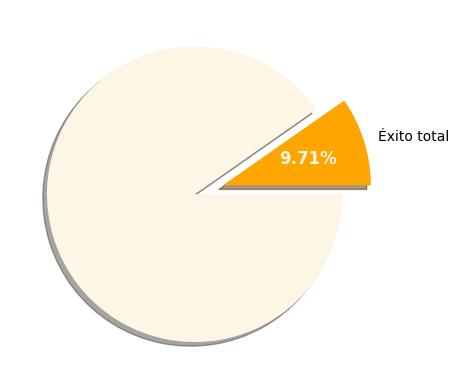

In [234]:
# Se muestra en un gráfico el porcentaje de ´títulos que se encuentra en al menos una de las columnas.    
valores = [(df_databooks.loc[(df_databooks["Seriado"] == True)&(df_databooks["Mejor Valorado"] == True)&(df_databooks["Premiado"] == True), "Título"].count()),\
          (df_databooks.loc[(df_databooks["Seriado"] == False)|(df_databooks["Mejor Valorado"] == False)|(df_databooks["Premiado"] == False), "Título"].count())]
_, _, autopcts = plt.pie(valores, labels = ["Éxito total",""],colors = ["orange","oldlace"],autopct = "%1.2f%%",explode = (0.2,0), shadow = True)
plt.setp(autopcts, **{"color":"#fdf5e6", "weight":"bold", "fontsize":12});


In [235]:
# Se revisa la información acerca de los títulos mejor valorados.
df_databooks["Valoración"].describe()


count    8734.000000
mean        3.986061
std         0.344889
min         0.000000
25%         3.790000
50%         3.990000
75%         4.190000
max         5.000000
Name: Valoración, dtype: float64

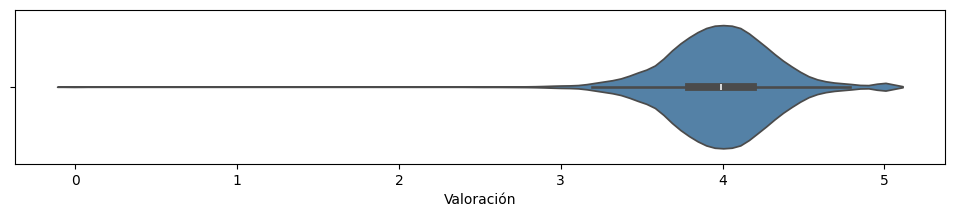

In [236]:
# Analizamos todas las notas
plt.figure(figsize=(12,2))
sns.violinplot(df_databooks["Valoración"], color="steelblue", orient = "h");


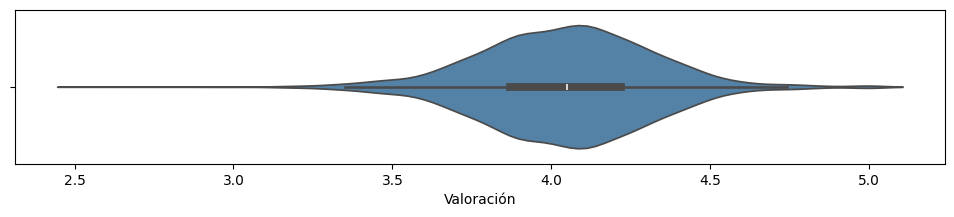

In [240]:
# Analizamos los que pertenecen a una serie
plt.figure(figsize=(12,2))
sns.violinplot(df_databooks.loc[df_databooks["Seriado"] == True, "Valoración"], color="steelblue", orient = "h");


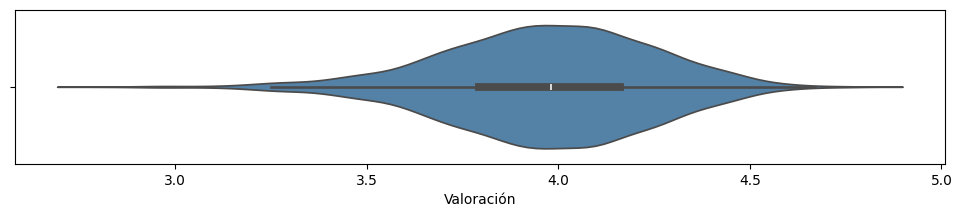

In [239]:
# Analizamos los que pertenecen a títulos premiados
plt.figure(figsize=(12,2))
sns.violinplot(df_databooks.loc[df_databooks["Premiado"] == True, "Valoración"], color="steelblue", orient = "h");


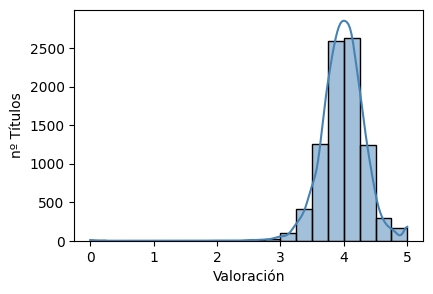

In [241]:
# Por último, vemos el histoplot de la columna valoración al completo.
fig,axs = plt.subplots(1,1,figsize= (4.5,3))
sns.histplot(df_databooks["Valoración"],kde=True,color="steelblue",bins=20, ax = axs)
axs.set_xlabel("Valoración")
axs.set_ylabel("nº Títulos");


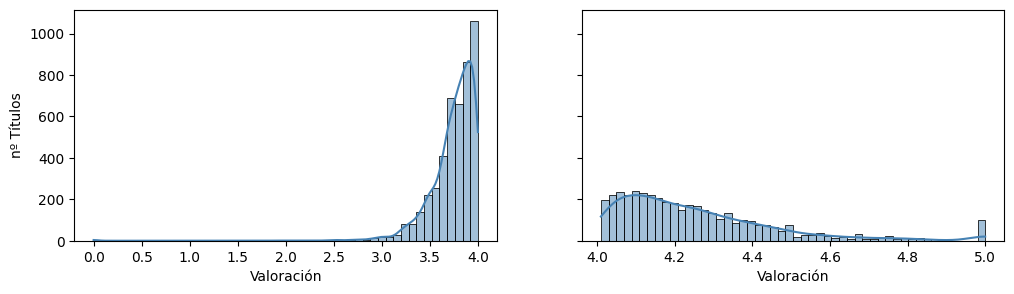

In [242]:
# Para las notas por debajo y por encima de 4
fig,axs = plt.subplots(1,2,figsize= (12,3), sharey = True)
sns.histplot(df_databooks.loc[df_databooks["Valoración"]<=4, "Valoración"],kde=True,color="steelblue",bins=50, ax = axs[0])
axs[0].set_xlabel("Valoración")
axs[0].set_ylabel("nº Títulos");
sns.histplot(df_databooks.loc[df_databooks["Valoración"]>4, "Valoración"],kde=True,color="steelblue",bins=50, ax = axs[1])
axs[1].set_xlabel("Valoración")
axs[1].set_ylabel("nº Títulos");


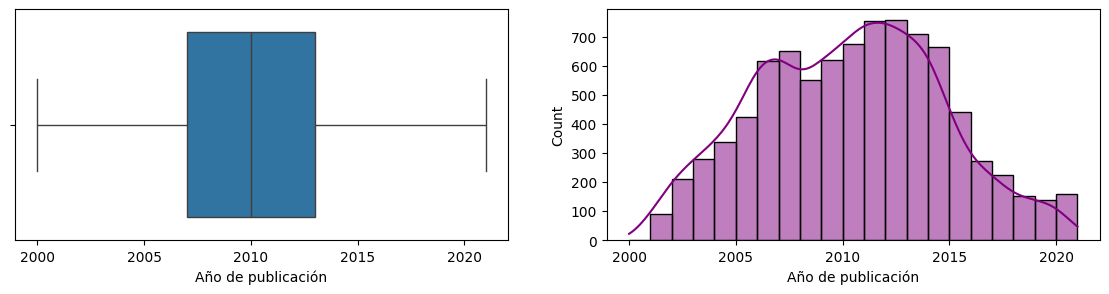

In [243]:
# Año de publicación de los títulos del siglo XXI
fig,axs = plt.subplots(1,2,figsize= (14,3))
sns.histplot(df_databooks["Año de publicación"],kde=True,color='purple',bins=21, ax = axs[1]);
sns.boxplot(x = "Año de publicación",data = df_databooks, ax=axs[0]);


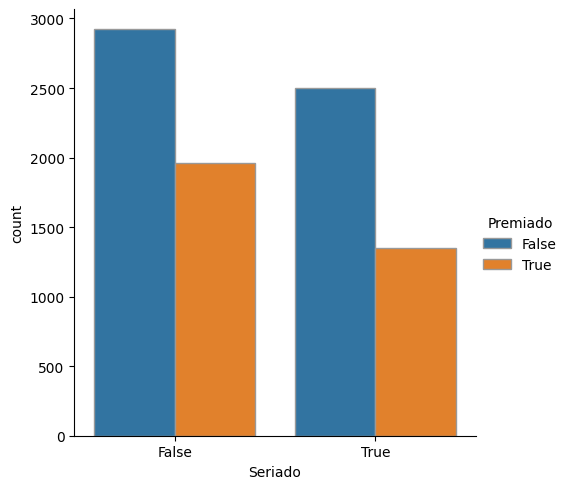

In [244]:
# Comparar dos categóricas, seriados y premiados
sns.catplot(x="Seriado",
            hue="Premiado",
            kind="count",
            edgecolor=".6",
            orient="V",
            data= df_databooks.sort_values("Seriado"));


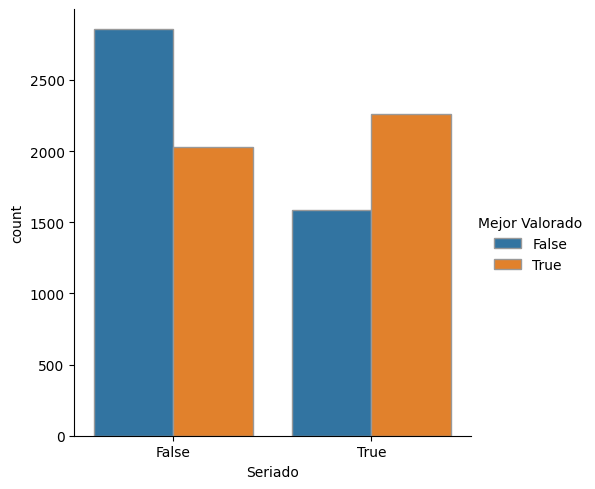

In [245]:
# Comparar dos categóricas, seriados y mejor valorados
sns.catplot(x="Seriado",
            hue="Mejor Valorado",
            kind="count",
            edgecolor=".6",
            orient="V",
            data= df_databooks.sort_values("Seriado"));

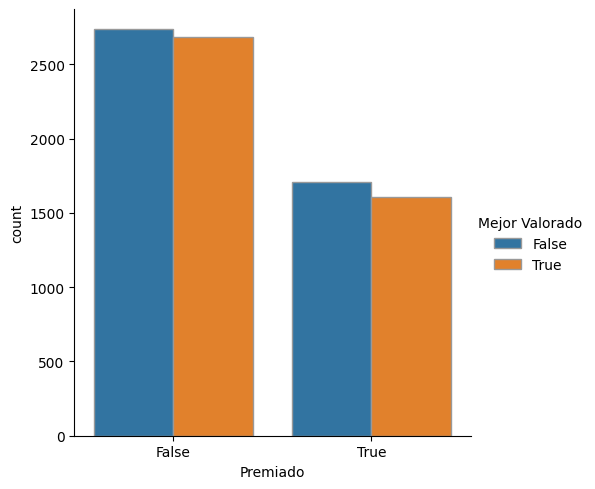

In [246]:
# Comparar dos categóricas, seriados y premiados
sns.catplot(x="Premiado",
            hue="Mejor Valorado",
            kind="count",
            edgecolor=".6",
            orient="V",
            data= df_databooks.sort_values("Premiado"));

In [ ]:
# Quiero ver cuantos seriados hay de género fantástico y de otros géneros
# Quiero ver cuantos mejor valorados hay de ficcion y no ficcion
# Se va a emplear la columna de mejor valorados como directora, enlazando con premiados y seriados
# Hacer una revisión de número de páginas
# Defender que los seriados de fantasía, con una fecha de publicación de 10-12 años son una apuesta segura.


In [247]:
# Se revisan las categorías de género más frecuentes, teniendo en cuenta que algunas están referenciadas en una lista
print(f"Hay {df_databooks.loc[df_databooks["Género"].str.contains("Fiction"), "Género"].count()} del género 'Fiction'")
print(f"Hay {df_databooks.loc[df_databooks["Género"].str.contains("Nonfiction"), "Género"].count()} del género 'Nonfiction'")

print(f"Hay {df_databooks.loc[df_databooks["Género"].str.contains("Fantasy"), "Género"].count()} del género 'Fantasy'")
print(f"Hay {df_databooks.loc[df_databooks["Género"].str.contains("Romance"), "Género"].count()} del género 'Romance'")
print(f"Hay {df_databooks.loc[df_databooks["Género"].str.contains("Historic"), "Género"].count()} del género 'Historical'")
print(f"Hay {df_databooks.loc[df_databooks["Género"].str.contains("Mystery"), "Género"].count()} del género 'Mystery'")
print(f"Hay {df_databooks.loc[df_databooks["Género"].str.contains("Science Fiction"), "Género"].count()} del género 'Science Fiction'")
print(f"Hay {df_databooks.loc[df_databooks["Género"].str.contains("Adventure"), "Género"].count()} del género 'Adventure'")
print(f"Hay {df_databooks.loc[df_databooks["Género"].str.contains("Thriller"), "Género"].count()} del género 'Thriller'")
print(f"Hay {df_databooks.loc[df_databooks["Género"].str.contains("Crime"), "Género"].count()} del género 'Crime'")
print(f"Hay {df_databooks.loc[df_databooks["Género"].str.contains("Humor"), "Género"].count()} del género 'Humor'")
print(f"Hay {df_databooks.loc[df_databooks["Género"].str.contains("Poetry"), "Género"].count()} del género 'Poetry'")
print(f"Hay {df_databooks.loc[df_databooks["Género"].str.contains("Classics"), "Género"].count()} del género 'Classics'")


Hay 5810 del género 'Fiction'
Hay 1677 del género 'Nonfiction'
Hay 2840 del género 'Fantasy'
Hay 2135 del género 'Romance'
Hay 1748 del género 'Historical'
Hay 1584 del género 'Mystery'
Hay 1355 del género 'Science Fiction'
Hay 1178 del género 'Adventure'
Hay 1008 del género 'Thriller'
Hay 706 del género 'Crime'
Hay 595 del género 'Humor'
Hay 154 del género 'Poetry'
Hay 104 del género 'Classics'


In [259]:
df_databooks.Autor.value_counts().head(40)

Autor
Lucian Bane               31
Lynsay Sands              26
Stephen King              21
Scott McElhaney           21
Richelle Mead             20
Jim Butcher               19
Victoria Laurie           18
Rick Riordan              18
Charlaine Harris          17
Terry Pratchett           17
Catherine Anderson        16
Byron Goines              16
Kelley Armstrong          16
Cassandra Clare           15
Derek Landy               15
Jeffery Deaver            14
John Flanagan             14
Jodi Picoult              13
Nalini Singh              13
Bernard Cornwell          12
P.C. Cast,Kristin Cast    12
Lee Child                 12
Joe Abercrombie           12
Dean Koontz               12
Sarah J. Maas             11
Ally Carter               11
James Patterson           11
Nicholas Sparks           11
Conn Iggulden             11
Alex Archer,Mel Odom      11
Brandon Sanderson         11
John Sandford             11
Scott Westerfeld          11
Janet Evanovich           11
J.D. Rob

In [260]:
# Buscar si los autores más repetidos son autores de libros seriados
# Comparar número total de autores con número de autores por encima de 10 y número de autores seriados


In [262]:
df_databooks.loc[df_databooks["Seriado"] == True]["Autor"].count()

np.int64(3850)

In [265]:
lista = df_databooks.Autor.unique()
print(len(lista))

5479


In [272]:
print(df_databooks.loc[(df_databooks["Seriado"] == True)&(df_databooks["Género"].str.contains("Fantasy"))]["Autor"].count())
print(df_databooks.loc[(df_databooks["Seriado"] == True)&(df_databooks["Género"].str.contains("Romance"))]["Autor"].count())
print(df_databooks.loc[(df_databooks["Seriado"] == True)&(df_databooks["Género"].str.contains("Historic"))]["Autor"].count())
print(df_databooks.loc[(df_databooks["Seriado"] == True)&(df_databooks["Género"].str.contains("Mistery"))]["Autor"].count())
print(df_databooks.loc[(df_databooks["Seriado"] == True)&(df_databooks["Género"].str.contains("Science Fiction"))]["Autor"].count())


2247
1484
609
0
1045


In [249]:
frecuencia = df_databooks["Género"].value_counts()
valores_repetidos = frecuencia[frecuencia > 5]
valores_repetidos

Género
Sin datos                                                                                                                   854
Fiction                                                                                                                      38
Fantasy                                                                                                                      21
Nonfiction                                                                                                                   14
Poetry                                                                                                                       13
Romance                                                                                                                      11
Historical,Historical Fiction                                                                                                 9
Mystery,Fiction,Humor,Womens Fiction,Chick Lit,Romance,Mystery,Crime,Humor,Comedy,Thriller,Myster

In [23]:
df_databooks["Año de publicación"].max()

np.int64(2021)

In [25]:
frecuencia = df_databooks["Editor"].value_counts()
valores_repetidos = frecuencia[frecuencia > 5]
valores_repetidos

Editor
Sin datos                    262
HarperCollins                 94
Little Brown and Company      93
Vintage                       87
St. Martin's Press            85
                            ... 
Shambhala                      6
Hogarth Press                  6
Harcourt Children's Books      6
Eerdmans                       6
Simon Pulse/Mercury Ink        6
Name: count, Length: 282, dtype: int64

In [26]:
df_bsbooks

,Título,Autor,Idioma original,Año de publicación,Ventas,Género
0,A TALE OF TWO CITIES,Charles Dickens,English,1859,>200 million,Historical fiction
1,THE LITTLE PRINCE,Antoine de Saint-Exupéry,French,1943,200 million,"Fantasy, children's fiction"
2,THE ALCHEMIST,Paulo Coelho,Portuguese,1988,150 million,Fantasy
3,HARRY POTTER AND THE PHILOSOPHER'S STONE,J. K. Rowling,English,1997,120 million,"Fantasy, children's fiction"
4,AND THEN THERE WERE NONE,Agatha Christie,English,1939,100 million,Mystery
...,...,...,...,...,...,...
160,FAHRENHEIT 451,Ray Bradbury,English,1953,10 million,NaN
161,ANGELA'S ASHES,Frank McCourt,English,1996,10 million,NaN
162,THE STORY OF MY EXPERIMENTS WITH TRUTH,Mohandas Karamchand Gandhi,Gujarati,1925–1929,10 million,NaN
163,BRIDGET JONES'S DIARY,Helen Fielding,English,1996,10 million,NaN


In [29]:
frecuencia = df_bsbooks["Género"].value_counts()
valores_repetidos = frecuencia[frecuencia > 0]
valores_repetidos

Género
Novel                            9
Children's literature            7
Self-help                        6
Fantasy, children's fiction      5
Children's fiction               3
                                ..
Historical fiction, war novel    1
Science fiction                  1
Dystopian fiction                1
Horror                           1
Romance, Fiction                 1
Name: count, Length: 76, dtype: int64